## QTM 347 HW 2

### Case Study 1: Self-Esteem


#### 2.1 Data Preparation


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.spatial.distance import euclidean
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/Leonh/Downloads/NLSY79.csv")

print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

print("Summary Statistics:")
print(df.describe())
print("\n" + "="*50 + "\n")

print("First few rows:")
print(df.head())
print("\n" + "="*50 + "\n")

print("Missing values (coded as negative):")
print("Income87 < 0:", (df['Income87'] < 0).sum())
print("HeightFeet05 < 0:", (df['HeightFeet05'] < 0).sum())
print("Job05 empty:", (df['Job05'] == '').sum())
print("\n" + "="*50 + "\n")

df_clean = df[(df['Income87'] >= 0) & 
              (df['HeightFeet05'] >= 0) & 
              (df['Job05'] != '')].copy()

print(f"Original dataset: {len(df)} rows")
print(f"Cleaned dataset: {len(df_clean)} rows")
print(f"Rows removed: {len(df) - len(df_clean)}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subject         2431 non-null   int64  
 1   Gender          2431 non-null   object 
 2   Education05     2431 non-null   int64  
 3   Income87        2431 non-null   int64  
 4   Job05           2375 non-null   object 
 5   Income05        2431 non-null   int64  
 6   Weight05        2431 non-null   int64  
 7   HeightFeet05    2431 non-null   int64  
 8   HeightInch05    2431 non-null   int64  
 9   Imagazine       2431 non-null   int64  
 10  Inewspaper      2431 non-null   int64  
 11  Ilibrary        2431 non-null   int64  
 12  MotherEd        2431 non-null   int64  
 13  FatherEd        2431 non-null   int64  
 14  FamilyIncome78  2431 non-null   int64  
 15  Science         2431 non-null   int64  
 16  Arith           2431 non-null   int64  
 17  Word            243

#### 2.2 Self Esteem Evaluation


##### a) Reverse Esteem 1, 2, 4, 6, and 7 so that a higher score corresponds to higher self-esteem. (Hint: if we store the esteem data in esteem data, then esteem data.iloc[:, [0, 1, 3, 5, 6]] = 5 - esteem data.iloc[:, [0, 1, 3, 5, 6]] to reverse the score.)


In [25]:
esteem_cols = [f'Esteem87_{i}' for i in range(1, 11)]
reverse_cols = ['Esteem87_1', 'Esteem87_2', 'Esteem87_4', 'Esteem87_6', 'Esteem87_7']
df_clean[reverse_cols] = 5 - df_clean[reverse_cols]

##### b) Write a brief summary with necessary plots about the 10 esteem measurements using matplotlib and seaborn

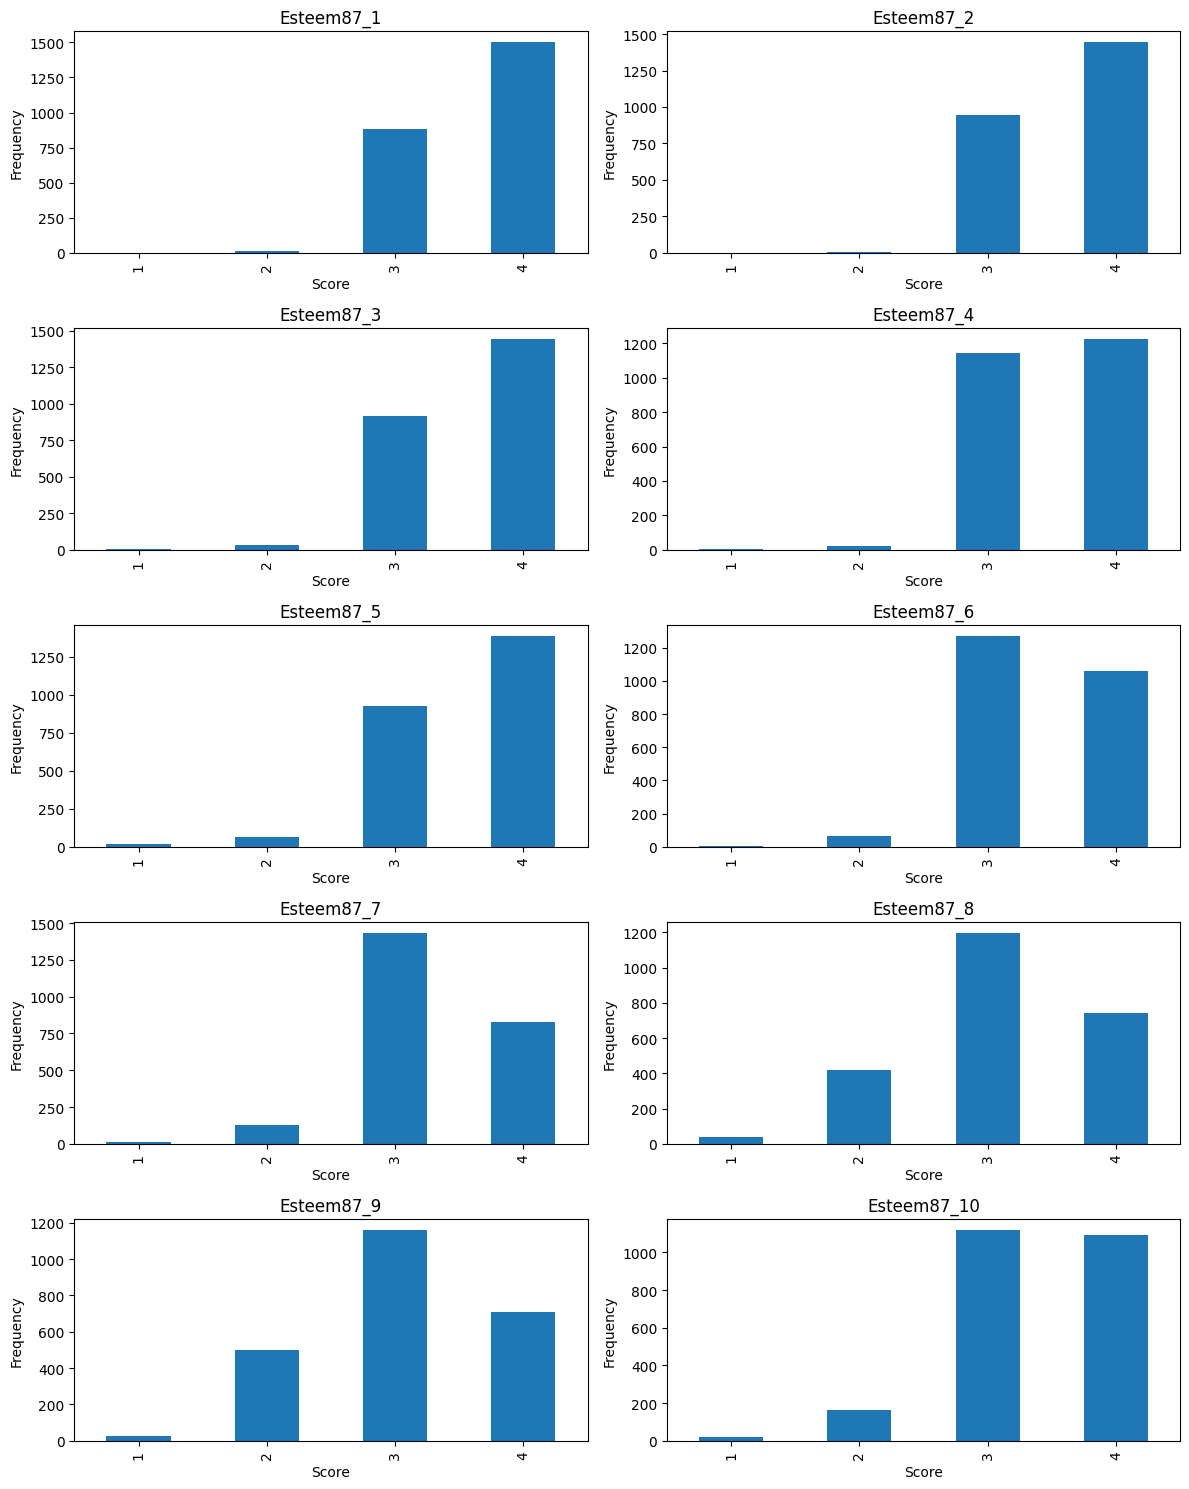

Summary Statistics for Esteem87 Questions:
        Esteem87_1   Esteem87_2   Esteem87_3   Esteem87_4   Esteem87_5  \
count  2401.000000  2401.000000  2401.000000  2401.000000  2401.000000   
mean      3.620991     3.598501     3.582674     3.496460     3.533528   
std       0.498791     0.501230     0.539228     0.532377     0.597757   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.000000     3.000000     3.000000     3.000000     3.000000   
50%       4.000000     4.000000     4.000000     4.000000     4.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

        Esteem87_6   Esteem87_7   Esteem87_8   Esteem87_9  Esteem87_10  
count  2401.000000  2401.000000  2401.000000  2401.000000  2401.000000  
mean      3.406914     3.281966     3.099542     3.064556     3.368596  
std       0.561043     0.580269     0.736322     0.739649     0.652812 

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))
axes = axes.ravel()

for i, col in enumerate(esteem_cols):
    df_clean[col].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('esteem_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Summary Statistics for Esteem87 Questions:")
print(df_clean[esteem_cols].describe())

Most of the 1987 self-esteem questions show people reporting fairly high self-esteem. For the positively worded items (like Esteem87_1, 2, 4, 6, 7), responses are concentrated on “strongly agree” and “agree.” For the negatively worded items (Esteem87_3, 5, 8, 9, 10), most people answered “disagree” or “strongly disagree,” which also reflects higher self-esteem. The averages line up with this pattern, and the spread is not very wide, meaning responses were fairly consistent. Overall the data suggests that in 1987 most respondents viewed themselves positively and had relatively high self-esteem.

##### c) Do esteem scores all positively correlated? Report the pairwise correlation table using df.corr() and write a brief summary.


Pairwise Correlation Matrix:
             Esteem87_1  Esteem87_2  Esteem87_3  Esteem87_4  Esteem87_5  \
Esteem87_1        1.000       0.703       0.447       0.525       0.399   
Esteem87_2        0.703       1.000       0.442       0.551       0.404   
Esteem87_3        0.447       0.442       1.000       0.407       0.553   
Esteem87_4        0.525       0.551       0.407       1.000       0.378   
Esteem87_5        0.399       0.404       0.553       0.378       1.000   
Esteem87_6        0.462       0.479       0.411       0.506       0.405   
Esteem87_7        0.377       0.409       0.342       0.421       0.370   
Esteem87_8        0.274       0.284       0.348       0.297       0.383   
Esteem87_9        0.238       0.261       0.350       0.288       0.356   
Esteem87_10       0.310       0.330       0.463       0.365       0.438   

             Esteem87_6  Esteem87_7  Esteem87_8  Esteem87_9  Esteem87_10  
Esteem87_1        0.462       0.377       0.274       0.238        0.3

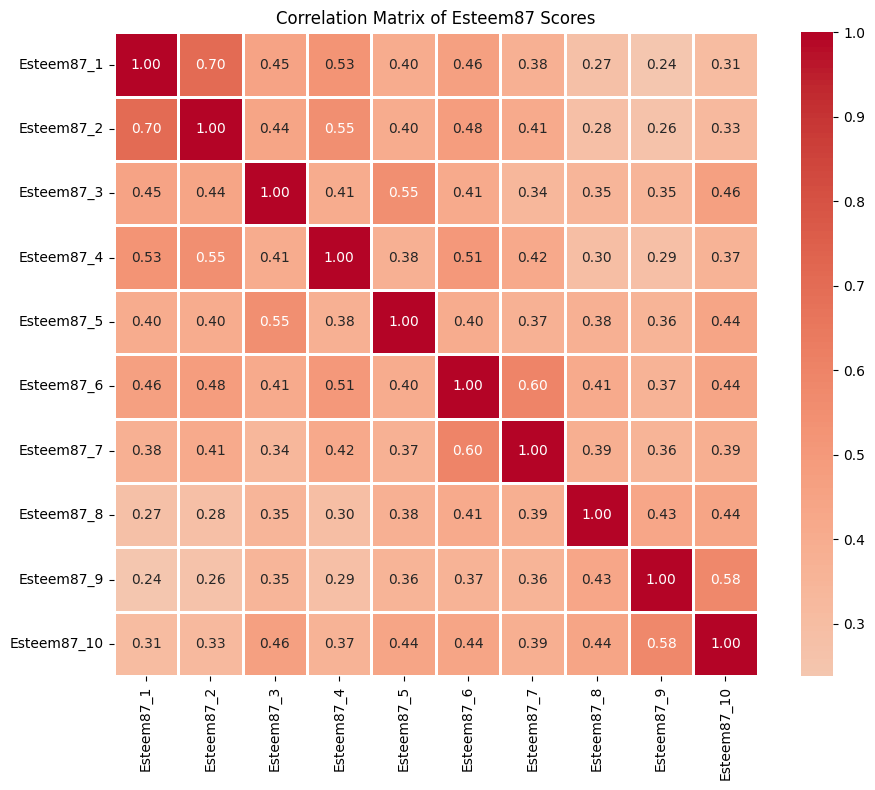

In [27]:
corr_matrix = df_clean[esteem_cols].corr()

print("Pairwise Correlation Matrix:")
print(corr_matrix.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Esteem87 Scores')
plt.tight_layout()
plt.savefig('esteem_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

The correlation results show that all ten self-esteem measures in 1987 are positively related to each other. Some questions that are worded similarly, like Esteem87_1 and Esteem87_2 or Esteem87_6 and Esteem87_7, have especially strong correlations. Other pairs are weaker, especially when comparing items that ask about very different aspects of self-esteem, but none are negative. 

##### d) PCA on 10 esteem measurements using sklearn.decomposition.PCA (centered but no scaling)

In [28]:
esteem_data = df_clean[esteem_cols].values
esteem_centered = esteem_data - esteem_data.mean(axis=0)

pca = PCA()
pca_scores = pca.fit_transform(esteem_centered)

print("PC1 Loadings:")
print(pd.Series(pca.components_[0], index=esteem_cols))
print("\n" + "="*50 + "\n")

print("PC2 Loadings:")
print(pd.Series(pca.components_[1], index=esteem_cols))
print("\n" + "="*50 + "\n")

pc1_norm = np.linalg.norm(pca.components_[0])
pc2_norm = np.linalg.norm(pca.components_[1])
print(f"PC1 vector norm: {pc1_norm:.6f}")
print(f"PC2 vector norm: {pc2_norm:.6f}")
print("\n" + "="*50 + "\n")

pc_correlation = np.corrcoef(pca_scores[:, 0], pca_scores[:, 1])[0, 1]
print(f"Correlation between PC1 and PC2 scores: {pc_correlation:.10f}")

PC1 Loadings:
Esteem87_1     0.234257
Esteem87_2     0.243972
Esteem87_3     0.277534
Esteem87_4     0.260254
Esteem87_5     0.311738
Esteem87_6     0.312488
Esteem87_7     0.299087
Esteem87_8     0.393865
Esteem87_9     0.399779
Esteem87_10    0.376309
dtype: float64


PC2 Loadings:
Esteem87_1    -0.376072
Esteem87_2    -0.370273
Esteem87_3    -0.151919
Esteem87_4    -0.322644
Esteem87_5    -0.133382
Esteem87_6    -0.207031
Esteem87_7    -0.159011
Esteem87_8     0.331446
Esteem87_9     0.575128
Esteem87_10    0.260236
dtype: float64


PC1 vector norm: 1.000000
PC2 vector norm: 1.000000


Correlation between PC1 and PC2 scores: -0.0000000000


i) Yes, both PC1 and PC2 are unit vectors. The norms of both vectors equal 1, meaning they are properly normalized unit vectors.
Yes, PC1 and PC2 are uncorrelated. The correlation between PC1 and PC2 scores is effectively 0, which confirms that the principal components are orthogonal and uncorrelated as expected from PCA theory.

ii) PC1 has all positive loadings that are pretty similar across all 10 esteem questions, ranging from about 0.23 to 0.40. This means PC1 is basically just the sum of all the esteem scores. We believe it's like an overall self-esteem measure where high PC1 means high self-esteem across the board, low PC1 means low self-esteem overall. The negatively-worded questions (8, 9, 10) have slightly higher weights but everything contributes positively.
PC2 is more interesting because it shows a contrast. The positively-worded questions (1, 2, 4, 6, 7) have negative loadings while the negatively-worded questions about feeling useless and worthless (8, 9, 10) have positive loadings. So PC2 captures the difference between how people respond to negative versus positive questions. High PC2 could mean someone agrees more with negative statements about themselves compared to positive ones, which might reflect response bias or a particular pattern of self-perception.

iii) The PC1 score for each subject is calculated by taking a weighted sum of their centered esteem scores, where the weights are the PC1 loadings. 

The formula we got is:


PC1 = 0.234 × Esteem87_1 + 0.244 × Esteem87_2 + 0.278 × Esteem87_3 + 0.260 × Esteem87_4 + 0.312 × Esteem87_5 + 0.313 × Esteem87_6 + 0.299 × Esteem87_7 + 0.394 × Esteem87_8 + 0.400 × Esteem87_9 + 0.376 × Esteem87_10

Correlation matrix of PC1 and PC2 scores:
[[ 1.00000000e+00 -1.44721207e-16]
 [-1.44721207e-16  1.00000000e+00]]




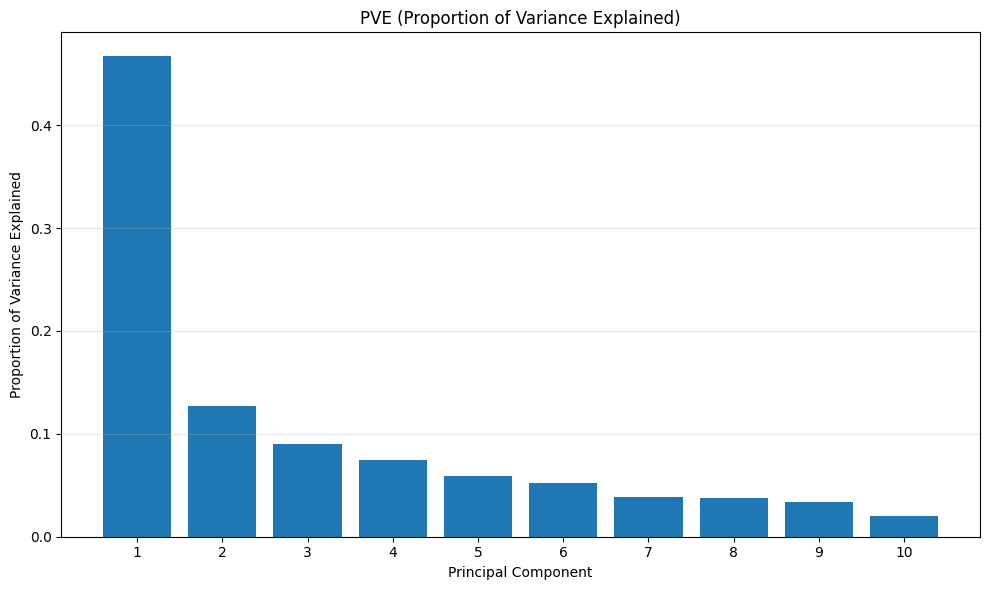

Proportion of Variance Explained by each PC:
PC1: 0.4670
PC2: 0.1269
PC3: 0.0900
PC4: 0.0750
PC5: 0.0590
PC6: 0.0519
PC7: 0.0387
PC8: 0.0372
PC9: 0.0338
PC10: 0.0205


In [29]:
# iv) 
print("Correlation matrix of PC1 and PC2 scores:")
print(np.corrcoef(pca_scores[:, 0], pca_scores[:, 1]))
print("\n" + "="*50 + "\n")

# v) 
pve = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pve)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('PVE (Proportion of Variance Explained)')
plt.xticks(range(1, 11))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('pve_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Proportion of Variance Explained by each PC:")
for i, var in enumerate(pve, 1):
    print(f"PC{i}: {var:.4f}")

iv) Yes, PC1 and PC2 scores are uncorrelated. The correlation matrix shows the correlation between them is essentially zero as our output is shown as -1.45e-16. This confirms what we expect from PCA are designed to be orthogonal and therefore uncorrelated with each other.


v) From the PVE plot, we can see that PC1 explains way more variance than any other component, showing about 46.7% of the total variance in the esteem data. There's a pretty clear drop-off after PC1, with PC2 explaining only 12.7%. After that, the variance explained keeps decreasing gradually with PC3 at 9.0%, PC4 at 7.5%, and so on.

Using the elbow rule, it looks like we should keep the first two principal components since there's a noticeable elbow after PC2. The remaining components all explain less than 10% each and drop off more gradually, so they're not adding much additional information. This makes sense because we think that the first two PCs capture the main patterns in how people respond to the esteem questions.


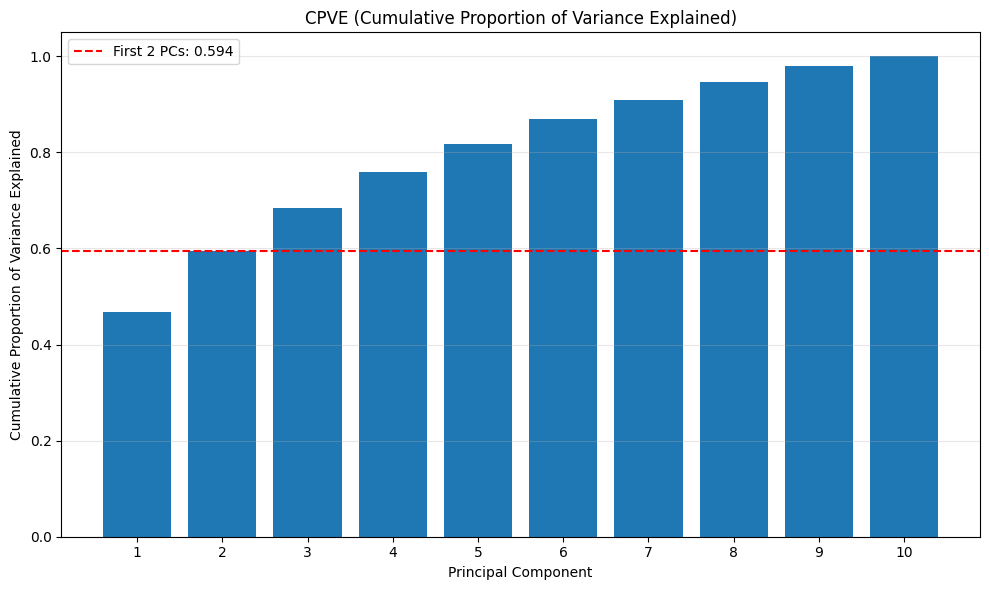


Variance explained by first two PCs: 0.5938


In [30]:
cpve = np.cumsum(pve)

plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), cpve)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('CPVE (Cumulative Proportion of Variance Explained)')
plt.xticks(range(1, 11))
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=cpve[1], color='r', linestyle='--', 
            label=f'First 2 PCs: {cpve[1]:.3f}')
plt.legend()
plt.tight_layout()
plt.savefig('cpve_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVariance explained by first two PCs: {cpve[1]:.4f}")

vi) The CPVE plot shows that the first two principal components together explain about 59.4% of the total variance in the esteem data. We think this is a pretty decent amount as we're capturing more than half of all the variation in the 10 esteem questions with just 2 dimensions.

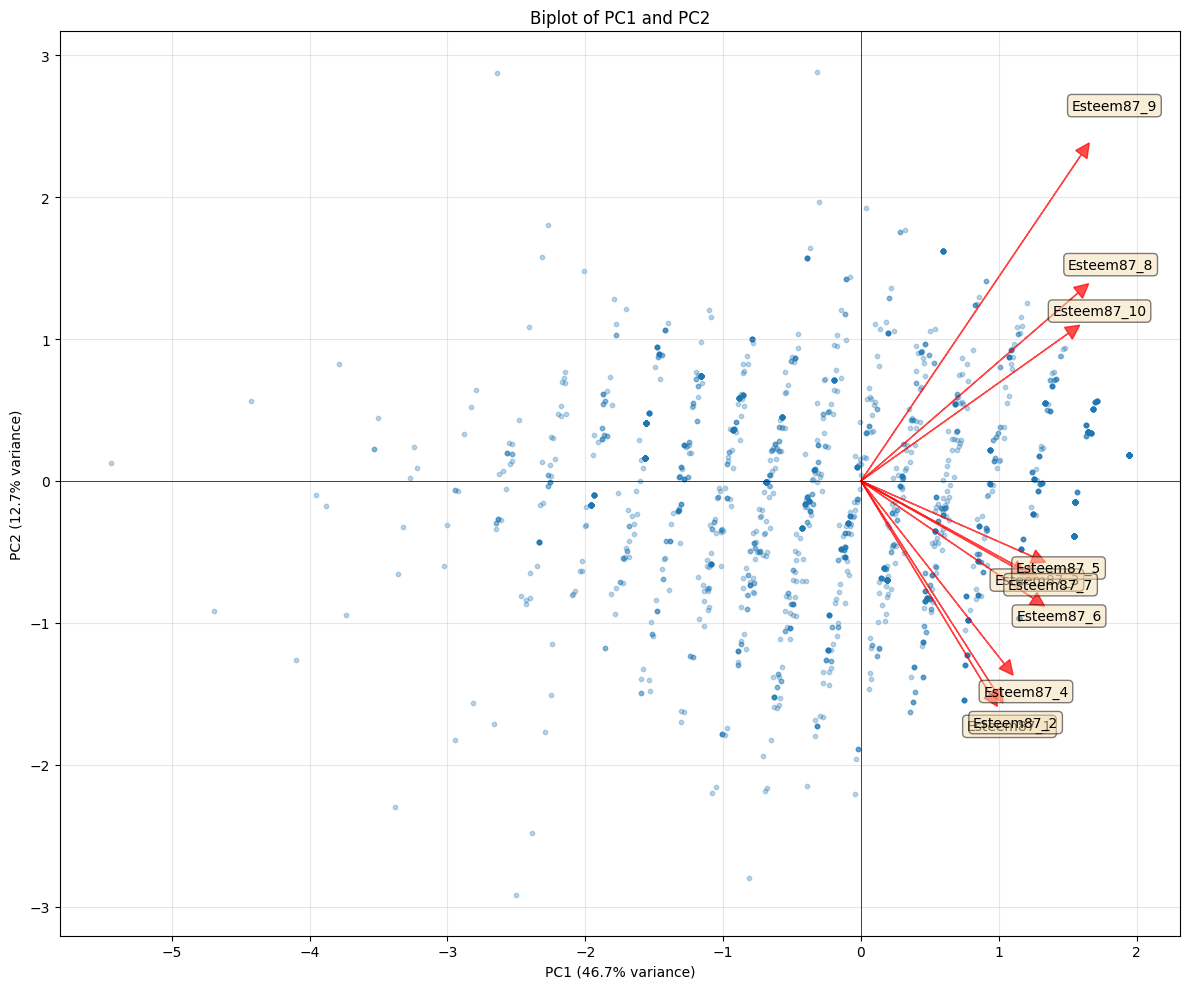

In [31]:
# vii) Biplot
def biplot(scores, loadings, labels, pc1=0, pc2=1):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    ax.scatter(scores[:, pc1], scores[:, pc2], alpha=0.3, s=10)
    
    scale = 4  
    for i, label in enumerate(labels):
        ax.arrow(0, 0, 
                loadings[pc1, i] * scale, 
                loadings[pc2, i] * scale,
                head_width=0.1, head_length=0.1, 
                fc='red', ec='red', alpha=0.7)
        ax.text(loadings[pc1, i] * scale * 1.15,
               loadings[pc2, i] * scale * 1.15,
               label, fontsize=10, ha='center', va='center',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.set_xlabel(f'PC{pc1+1} ({pve[pc1]:.1%} variance)')
    ax.set_ylabel(f'PC{pc2+1} ({pve[pc2]:.1%} variance)')
    ax.set_title('Biplot of PC1 and PC2')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    
    plt.tight_layout()
    return fig

biplot(pca_scores, pca.components_, esteem_cols)
plt.savefig('biplot.png', dpi=300, bbox_inches='tight')
plt.show()

vii) 
Looking at the loadings, we can see that all 10 esteem questions point generally to the right, meaning they're all positively correlated with PC1. This confirms our earlier interpretation that PC1 is basically an overall self-esteem measure. Subjects on the positive PC1 have higher overall self-esteem, while those on the left have lower self-esteem.
For PC2, we noticed there's a clear split. Questions 8, 9, and 10 point upward, while questions 1, 2, 4, 5, 6, and 7 point downward. This means PC2 separates people based on whether they score higher on the negative questions versus the positive ones. People at the top of the plot tend to agree more with negative self-statements relative to their overall esteem level, while people at the bottom agree more with positive self-statements.

We also noticed that the blue dots are pretty spread out across both dimensions, which means there's decent variation in self-esteem patterns. Most people cluster around the center and upper-right quadrant, which shows that there is a average to above-average self-esteem with some variation in response patterns to positive versus negative questions.


##### e) Apply k-means to cluster subjects on the original esteem scores using sklearn.cluster.KMeans

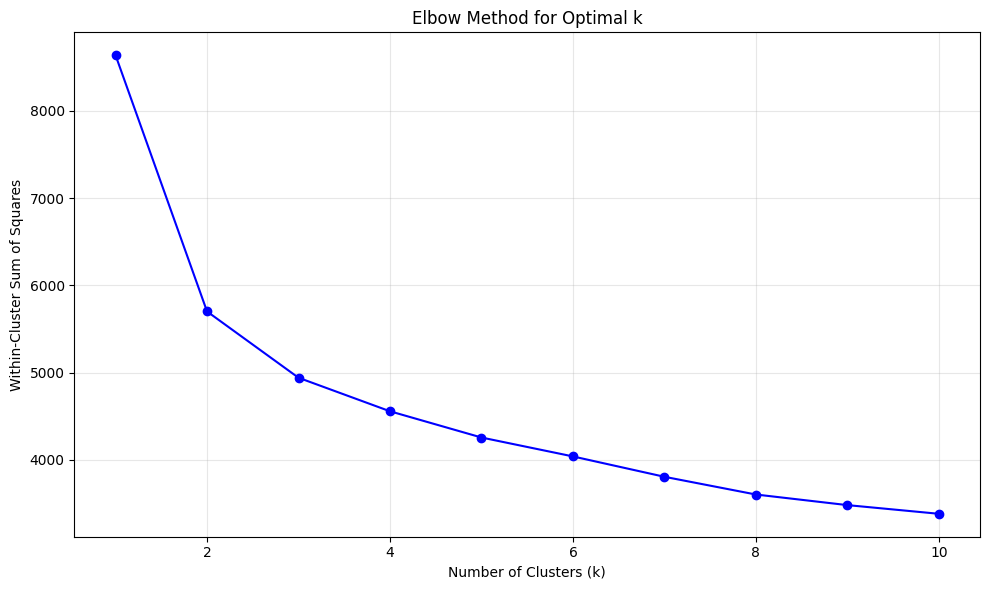

Within-cluster sum of squares for each k:
k=1: 8636.22
k=2: 5699.50
k=3: 4939.97
k=4: 4555.64
k=5: 4255.05
k=6: 4038.19
k=7: 3804.82
k=8: 3601.63
k=9: 3480.15
k=10: 3380.60


In [32]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clean[esteem_cols])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('elbow_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("Within-cluster sum of squares for each k:")
for k, inertia in zip(K_range, inertias):
    print(f"k={k}: {inertia:.2f}")

i) Looking at the elbow plot, there's a pretty sharp drop in the within-cluster sum of squares from k=1 to k=2 and another noticeable drop from k=2 to k=3. After k=3, the curve starts to flatten out more gradually.
Using the elbow rule, we would pick k=3. Because that's where we see the "elbow" in the curve as after that point, adding more clusters doesn't give us as much improvement in reducing the within-cluster variance.

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(df_clean[esteem_cols])

cluster_means = df_clean.groupby('cluster')[esteem_cols].mean()
print("Mean Esteem Scores by Cluster:")
print(cluster_means)
print("\n" + "="*50 + "\n")

print("Cluster sizes:")
print(df_clean['cluster'].value_counts().sort_index())

Mean Esteem Scores by Cluster:
         Esteem87_1  Esteem87_2  Esteem87_3  Esteem87_4  Esteem87_5  \
cluster                                                               
0          3.160798    3.133803    3.104460    3.053991    3.016432   
1          3.880342    3.881563    3.935287    3.813187    3.952381   
2          3.867123    3.823288    3.745205    3.657534    3.667123   

         Esteem87_6  Esteem87_7  Esteem87_8  Esteem87_9  Esteem87_10  
cluster                                                               
0          2.968310    2.913146    2.713615    2.659624     2.899061  
1          3.814408    3.699634    3.772894    3.743590     3.934066  
2          3.461644    3.243836    2.794521    2.775342     3.282192  


Cluster sizes:
cluster
0    852
1    819
2    730
Name: count, dtype: int64


ii) Looking at the mean scores, we think the three clusters have pretty distinct self-esteem profiles.

Cluster 0 has the lowest scores across the board, averaging around 3.0-3.1 on the positive questions and even lower on the negative questions. 

Cluster 1 has the highest scores everywhere, with most questions averaging between 3.7 and 3.9. This is clearly the high self-esteem group as they strongly agree that they're worth something, have good qualities, and do things well.

Cluster 2 is kind of in between but with an interesting pattern. They score pretty high on the positive questions but then drop down on the negative questions, especially 8 and 9. So we this might be people with more moderate or mixed self-esteem.

Overall we think the cluster sizes are pretty balanced too, we have 852, 819, and 730 people in each, so we've got roughly equal groups.

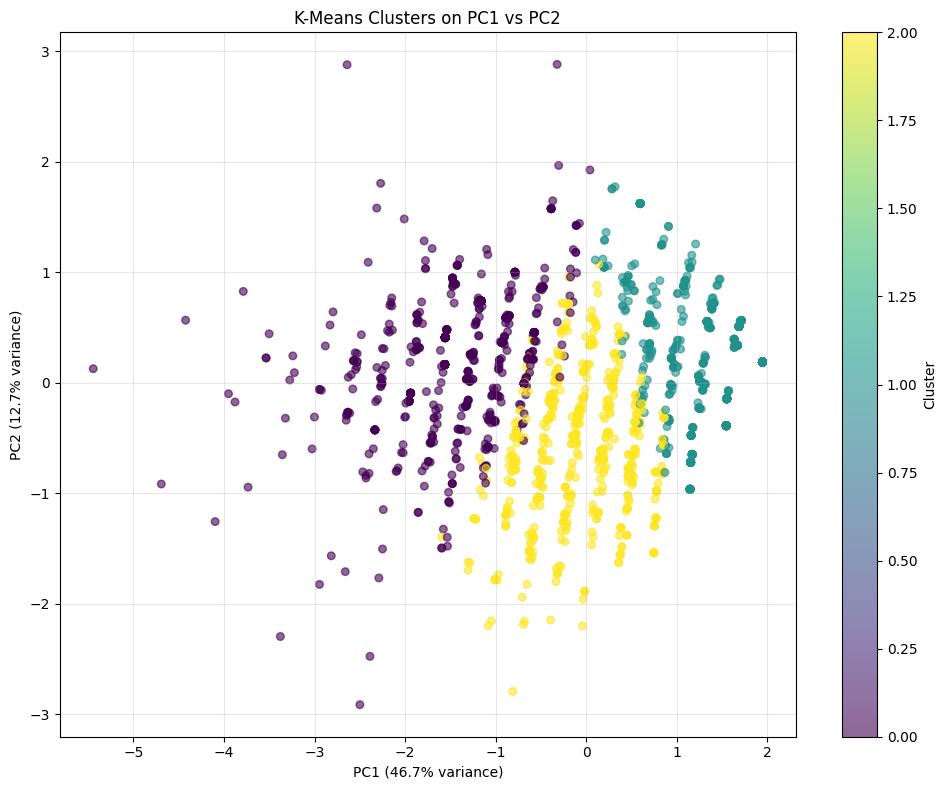

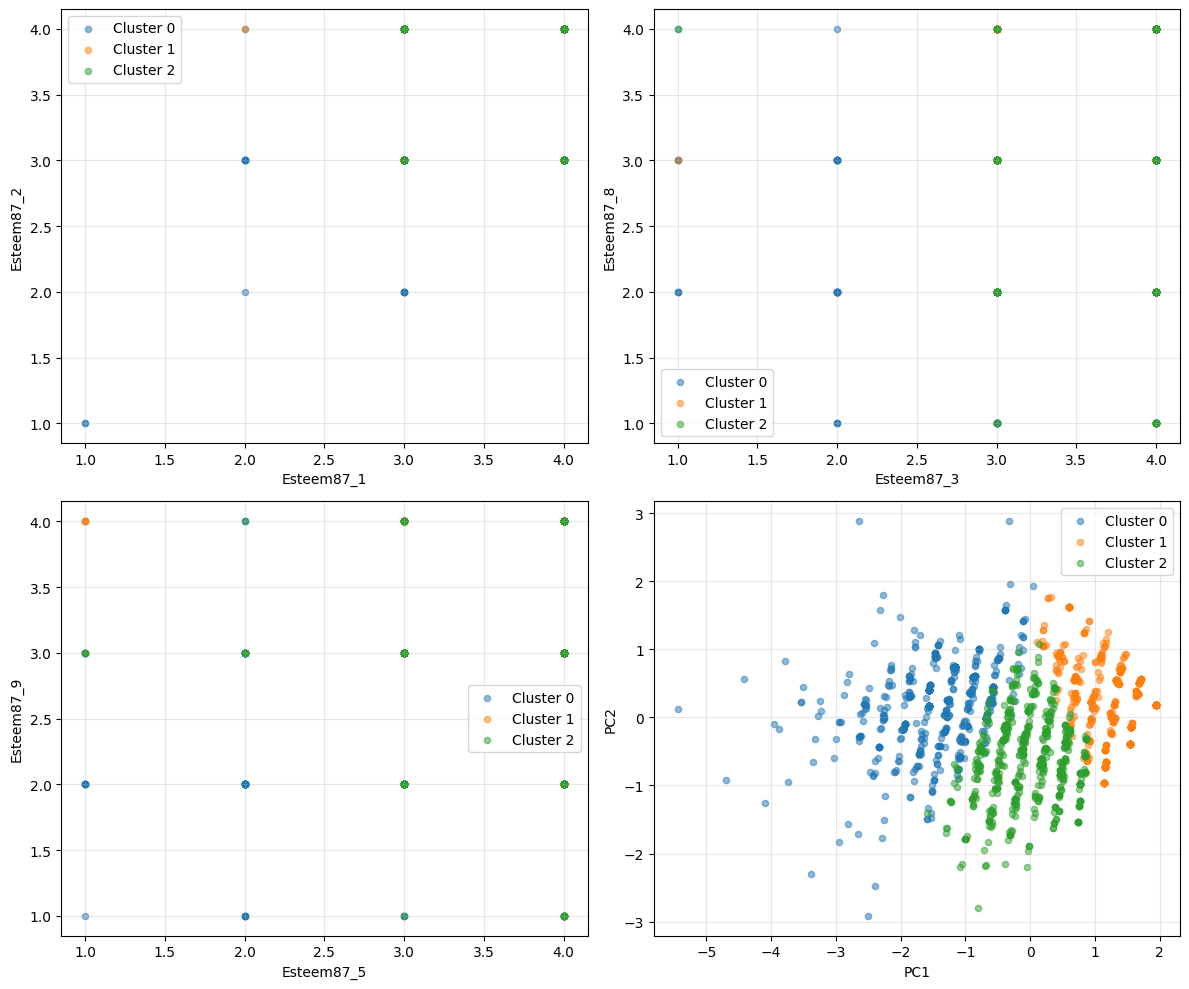

In [34]:
df_clean['PC1'] = pca_scores[:, 0]
df_clean['PC2'] = pca_scores[:, 1]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_clean['PC1'], df_clean['PC2'], 
                     c=df_clean['cluster'], cmap='viridis', 
                     alpha=0.6, s=30)
plt.xlabel(f'PC1 ({pve[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pve[1]:.1%} variance)')
plt.title('K-Means Clusters on PC1 vs PC2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('clusters_pc.png', dpi=300, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

pairs = [('Esteem87_1', 'Esteem87_2'), 
         ('Esteem87_3', 'Esteem87_8'),
         ('Esteem87_5', 'Esteem87_9'),
         ('PC1', 'PC2')]

for idx, (var1, var2) in enumerate(pairs):
    ax = axes[idx//2, idx%2]
    for cluster in range(3):
        mask = df_clean['cluster'] == cluster
        ax.scatter(df_clean.loc[mask, var1], 
                  df_clean.loc[mask, var2],
                  label=f'Cluster {cluster}', alpha=0.5, s=20)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('clusters_various_pairs.png', dpi=300, bbox_inches='tight')
plt.show()

iii) The PC1 vs PC2 plot shows pretty clear separation between the three clusters. Cluster 0 is mostly on the left side with negative PC1 values. Cluster 1 is on the right with positive PC1 values, which are the high self-esteem group. Cluster 2 is also mostly on the right but sits lower on PC2, which matches what we saw in the means table where they scored high on positive questions but lower on the negative ones.

However, we noticed that the boundaries aren't perfect as there's some overlap especially in the middle where clusters meet. PC1 does most of the work separating high from low self-esteem, while PC2 helps distinguish between different response patterns to positive versus negative questions. And we believe the clustering makes sense given what we know about the PCA.

##### f) We now try to find out what factors are related to self-esteem? PC1 of all the Esteem scores is a good variable to summarize one’s esteem scores. We take PC1 as our response variable.

In [35]:
# f) i) 
df_clean['Gender_numeric'] = (df_clean['Gender'] == 'male').astype(int)
df_clean['log_Income87'] = np.log(df_clean['Income87'] + 1)
df_clean['BMI05'] = (df_clean['Weight05'] * 0.453592) / ((df_clean['HeightFeet05'] + df_clean['HeightInch05']/12) * 0.3048) ** 2

df_clean['log_FamilyIncome78'] = np.log(df_clean['FamilyIncome78'] + 1)

asvab_cols = ['AFQT', 'Coding', 'Auto', 'Mechanic', 'Elec', 
              'Science', 'Math', 'Arith', 'Word', 'Parag', 'Number']

asvab_data = df_clean[asvab_cols].values
scaler_asvab = StandardScaler()
asvab_scaled = scaler_asvab.fit_transform(asvab_data)
pca_asvab = PCA()
asvab_pc_scores = pca_asvab.fit_transform(asvab_scaled)
df_clean['ASVAB_PC1'] = asvab_pc_scores[:, 0]

print("ASVAB PCA - Variance Explained by first 5 PCs:")
for i, var in enumerate(pca_asvab.explained_variance_ratio_[:5], 1):
    print(f"PC{i}: {var:.4f}")
print(f"\nTotal variance explained by PC1: {pca_asvab.explained_variance_ratio_[0]:.4f}")

ASVAB PCA - Variance Explained by first 5 PCs:
PC1: 0.6273
PC2: 0.1333
PC3: 0.0587
PC4: 0.0467
PC5: 0.0286

Total variance explained by PC1: 0.6273


In [ ]:
# f) ii) 
import statsmodels.api as sm

y = df_clean['PC1']

# Model 1: Personal info only
X1 = df_clean[['Gender_numeric', 'Education05', 'log_Income87', 'BMI05']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()
print("="*80)
print("Model 1: Personal Information")
print("="*80)
print(model1.summary())
print("\n" + "="*80 + "\n")

# Model 2: Household environment only
X2 = df_clean[['Imagazine', 'Inewspaper', 'Ilibrary', 
               'MotherEd', 'FatherEd', 'log_FamilyIncome78']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print("Model 2: Household Environment")
print("="*80)
print(model2.summary())
print("\n" + "="*80 + "\n")

# Model 3: ASVAB only
X3 = df_clean[['ASVAB_PC1']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()
print("Model 3: ASVAB PC1")
print("="*80)
print(model3.summary())
print("\n" + "="*80 + "\n")

# Model 4: Full model
X4 = df_clean[['Gender_numeric', 'Education05', 'log_Income87', 'BMI05',
               'Imagazine', 'Inewspaper', 'Ilibrary',
               'MotherEd', 'FatherEd', 'log_FamilyIncome78',
               'ASVAB_PC1']]
X4 = sm.add_constant(X4)
model4 = sm.OLS(y, X4).fit()
print("Model 4: Full Model")
print("="*80)
print(model4.summary())

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(f"Model 1 (Personal Info)    - R²: {model1.rsquared:.4f}, Adj R²: {model1.rsquared_adj:.4f}")
print(f"Model 2 (Household)        - R²: {model2.rsquared:.4f}, Adj R²: {model2.rsquared_adj:.4f}")
print(f"Model 3 (ASVAB PC1)        - R²: {model3.rsquared:.4f}, Adj R²: {model3.rsquared_adj:.4f}")
print(f"Model 4 (Full Model)       - R²: {model4.rsquared:.4f}, Adj R²: {model4.rsquared_adj:.4f}")

Model 1: Personal Information
                            OLS Regression Results                            
Dep. Variable:                    PC1   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     48.12
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           5.67e-39
Time:                        23:46:16   Log-Likelihood:                -3936.6
No. Observations:                2401   AIC:                             7883.
Df Residuals:                    2396   BIC:                             7912.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

ii) Looking at all four models, Model 4 performs best with an R² of 0.101 and adjusted R² of 0.097. It's not a huge improvement over the individual models, but it does capture the most variance in self-esteem PC1.

Model 3 actually does surprisingly well on its own with R² of 0.078, suggesting intelligence is a pretty strong predictor. Model 1 is close behind at R² of 0.074, while Model 2 is the weakest at R² of 0.052.

In the full model, the significant predictors are Education05, log_Income87, and ASVAB_PC1. We noticed that some variables that were significant in their individual models, like MotherEd, FatherEd, Imagazine, no longer have significance in the full model, probably due to multicollinearity as they're correlated with education and income. 

I'd go with the full model as the final model since it has the highest R² and includes the most information, even though not all predictors are individually significant. 

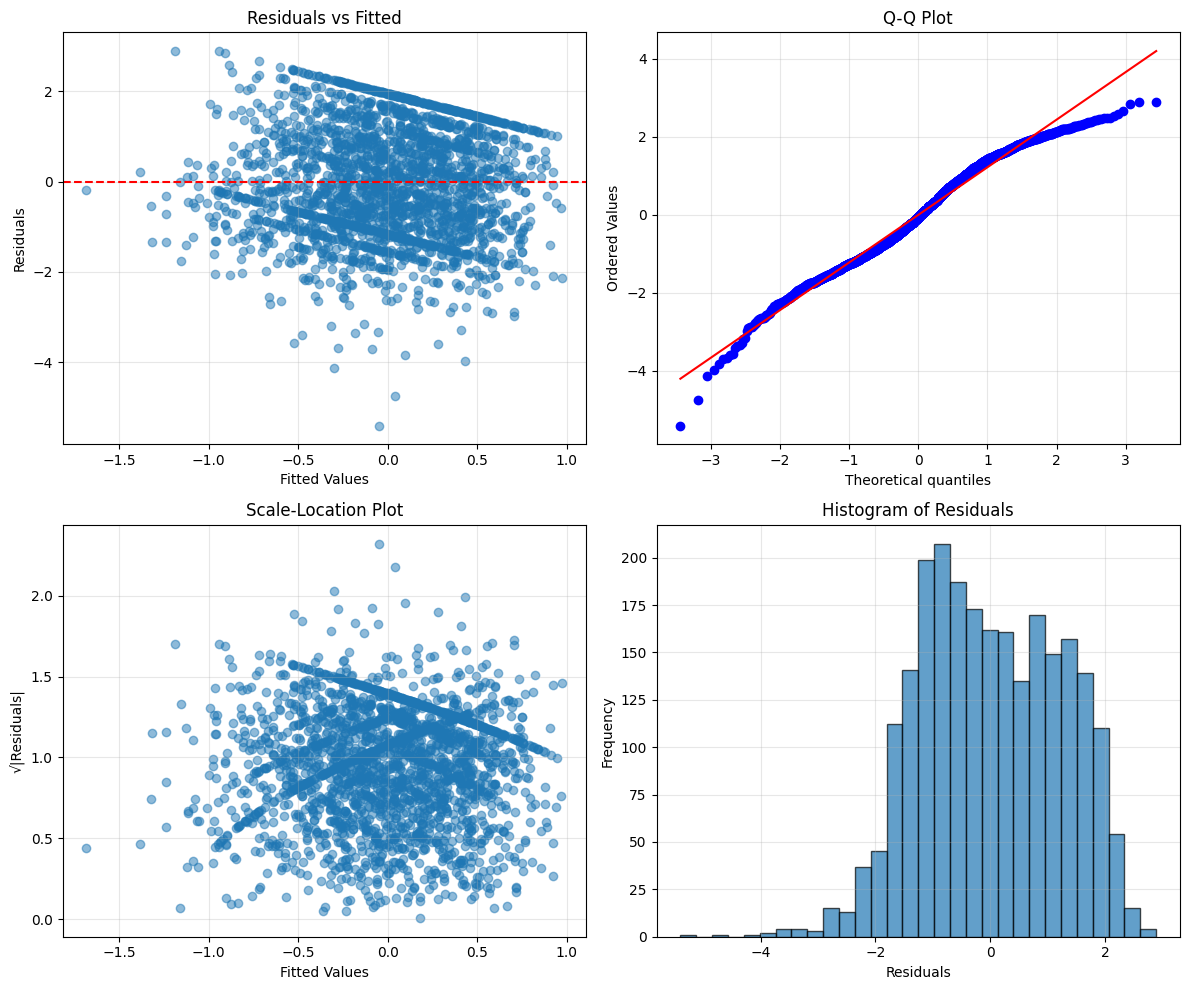

In [37]:
# f) iii) 
final_model = model4  

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(final_model.fittedvalues, final_model.resid, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True, alpha=0.3)

stats.probplot(final_model.resid, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(final_model.fittedvalues, np.sqrt(np.abs(final_model.resid)), alpha=0.5)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(final_model.resid, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()

iii) We think the residuals vs fitted plot looks good as it shows random scatter with no pattern, so linearity and homoscedasticity are fine. The Q-Q plot shows some deviation in the tails, especially the upper tail, meaning the residuals aren't perfectly normal. But with n=2401, this isn't a huge issue. Overall, we think the linear model assumptions are reasonably met, just some non-normality in the extremes.


iv) In summary, our full model shows that education, income, and intelligence (ASVAB PC1) all significantly predict self-esteem. We found out that more education is associated with higher self-esteem wuth coef = 0.065, higher income also increases self-esteem with coef = 0.027, and higher intelligence has a positive effect too! With coef = 0.076.

Interestingly, we found out that household environment variables like having magazines, newspapers, parents' education aren't significant in the full model even though they were on their own. This probably means their effects work through education and income as it is reasonable to think that the kids from better household environments get more education and earn more, which then affects their self-esteem.

Gender, BMI, and family income aren't significant predictors once we control for everything else. The model explains about 10% of the variance in self-esteem, which is ok but reasonable for social science data with lots of unmeasured factors like personality and life experiences.